In [177]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from collections import defaultdict
from numpy import nan

In [178]:
def proba_herd(N, mu, c, L):
    return(1-np.exp(-N*mu*(L/(c+L))*(1-1/3)))

In [179]:
with open('simulation_results_q1_q04.txt', 'rb') as f:
    matrices_proba = pickle.load(f)

In [181]:
def calculate_ticks(ticklabels, truerange, tickrange):
    tick_pos = []
    for l in ticklabels:
        tick_pos.append((l*(tickrange[0]+tickrange[1]))/(truerange[0]+truerange[1]))
    return(tick_pos)

In [182]:
def proba_herd(N, mu, c, L):
    alpha = L/(c+L)
    R0=3
    beta = ((1-1/R0)**2)/2
    return(1-np.exp(-mu*N*alpha*beta))
    #return(1-np.exp(-N*mu*(L/(c+L))*(0.5*(1-1/3))**2))

def partial_A(q, R0):
    return((q/(1-q))*(((1-R0)/R0)+(1/(1-q))*np.log(R0/(1+q*(R0-1)))))

def proba_herd_partial(N, mu, c, L, q):
    R0 = 3
    A = partial_A(q, R0)
    return(1-np.exp(-N*mu*(L/(c+L))*A))

In [183]:
def time_herd(N, c, L, R0):
    return((N/(c+L))*(1-1/R0))

In [184]:
time_herd(1e8, 30000, 500000, 3)

125.7861635220126

In [185]:
def proba_days(t, N, mu, c, L):
    return(1-np.exp((-mu*L*(c+L)*t*t)/(2*N)))

In [186]:
#pairs_table = [[1e4,1e5], [5e4,1e5], [1e4,1e6], [5e4,1e6],[3e4,5e5]]
pairs_table = [[1e4,1e5], [1e4,5e5], [2e4,5e5], [5e4,5e5],[1e4,1e6],[2e4,1e6],[5e4,1e6]]

In [167]:
p=0

In [168]:
pairs_table

[[10000.0, 100000.0],
 [10000.0, 500000.0],
 [20000.0, 500000.0],
 [50000.0, 500000.0],
 [10000.0, 1000000.0],
 [20000.0, 1000000.0],
 [50000.0, 1000000.0]]

In [174]:
N = 1e9

In [175]:
for p in range(len(pairs_table)):
    print(pairs_table[p][0]*10, pairs_table[p][1]*10)
    T = time_herd(N, pairs_table[p][1]*10, pairs_table[p][0]*10, 3)
    print('Time to herd immunity', T)
    for days in [50,100,200]:
        print(days, proba_days(days, N, 1e-7, pairs_table[p][1]*10, pairs_table[p][0]*10))
    print('\nP', proba_herd(N, 1e-7, pairs_table[p][1]*10, pairs_table[p][0]*10), proba_days(T, N, 1e-7, pairs_table[p][1]*10, pairs_table[p][0]*10))
    print('\n')

100000.0 1000000.0
Time to herd immunity 606.0606060606061
50 0.013655900532955956
100 0.05351485204651618
200 0.1974812020375215

P 0.867371331296937 0.867371331296937


100000.0 5000000.0
Time to herd immunity 130.71895424836603
50 0.06176046990428874
100 0.22508350203891903
200 0.6394050598269216

P 0.3532075650678588 0.3532075650678588


200000.0 5000000.0
Time to herd immunity 128.20512820512823
50 0.1219045690794387
100 0.4054794520298056
200 0.8750697878014175

P 0.5745895684195585 0.5745895684195587


500000.0 5000000.0
Time to herd immunity 121.21212121212122
50 0.2908938175626016
100 0.7471604041952535
200 0.995913228561536

P 0.867371331296937 0.867371331296937


100000.0 10000000.0
Time to herd immunity 66.00660066006601
50 0.1186055293801116
100 0.39649442457295947
200 0.8673445349198783

P 0.1974988590225477 0.1974988590225477


200000.0 10000000.0
Time to herd immunity 65.35947712418302
50 0.22508350203891903
100 0.6394050598269216
200 0.9830925343472947

P 0.35320756506

In [187]:
calculated = np.zeros((25,25))

for i in range(25):
    for j in range(25):
        P = proba_herd(1e6, 1e-6, c_values[j], i_values[::-1][i])
        calculated[i,j] = P
        
calculated_partial = np.zeros((25,25))

for i in range(25):
    for j in range(25):
        P = proba_herd_partial(1e6, 1e-6, c_values[j], i_values[::-1][i], 0.4)
        calculated_partial[i,j] = P

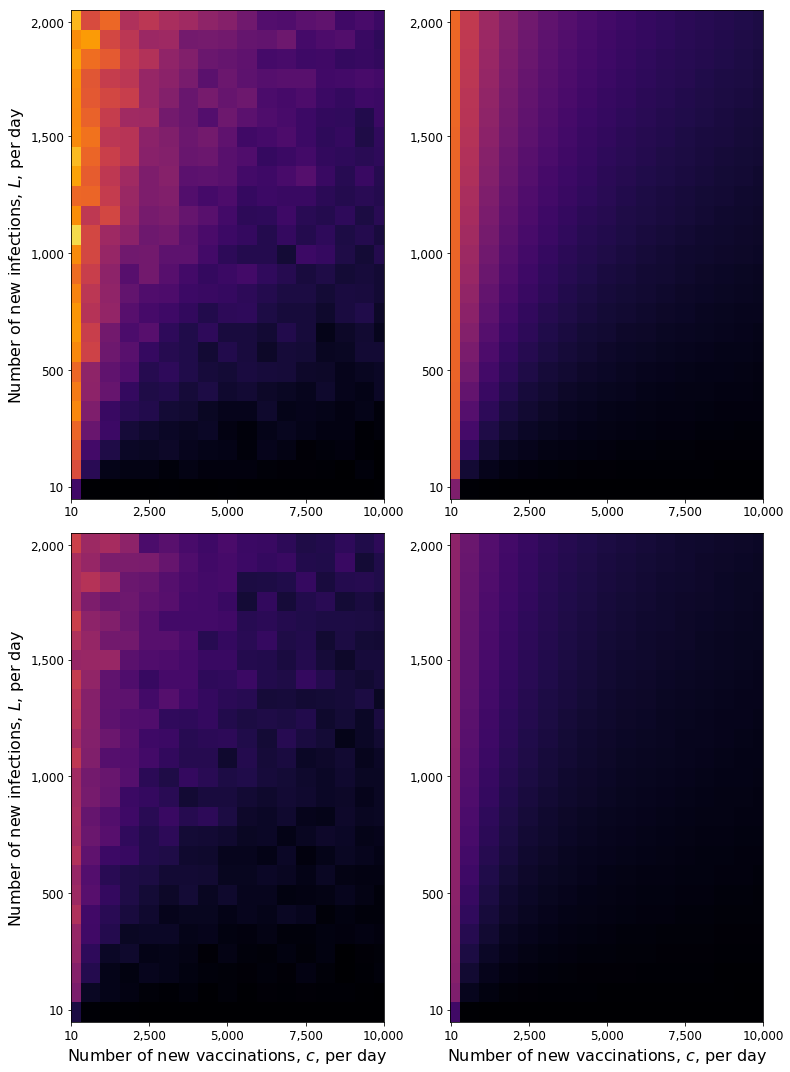

In [202]:
fig, ax = plt.subplots(2,2,figsize = (11,15))

c = ax[0,0].imshow(matrices_proba['full_escape'][1], cmap = 'inferno', vmax = 0.3)
ax[0,1].imshow(calculated, cmap = 'inferno', vmax = 0.3)

ax[1,0].imshow(matrices_proba['partial_escape'][1], cmap = 'inferno', vmax = 0.3)
ax[1,1].imshow(calculated_partial, cmap = 'inferno', vmax = 0.3)

for i in range(2):
    for j in range(2):
        ax[j,i].set_yticks(calculate_ticks([10,500,1000,1500,2000], [10,2000], [0,24]))
        ax[j,i].set_yticklabels(['10','500','1,000','1,500','2,000'][::-1], fontsize = 12)
        ax[j,i].set_xticks(calculate_ticks([10,2500,5000,7500,10000,12500,15000], [10,15000], [0,24]))
        ax[j,i].set_xticklabels(['10', '2,500','5,000','7,500','10,000','12,500','15,000'], fontsize = 12)
        ax[j,i].set_xlim(0,calculate_ticks([10,2500,5000,7500,10000,12500,15000], [10,15000], [0,24])[4])
        
        ax[j,0].set_ylabel('Number of new infections, $L$, per day', fontsize=16)
        ax[1,i].set_xlabel('Number of new vaccinations, $c$, per day', fontsize=16)

#plt.colorbar(c)
plt.tight_layout()
plt.savefig('Figure_S2.jpg', dpi=400)

In [197]:
calculated

array([[1.98376826e-01, 1.55234575e-01, 1.27478087e-01, 1.08131817e-01,
        9.38794018e-02, 8.29443438e-02, 7.42897499e-02, 6.72698968e-02,
        6.14617360e-02, 5.65765563e-02, 5.24105967e-02, 4.88159497e-02,
        4.56826546e-02, 4.29272639e-02, 4.04853073e-02, 3.83061887e-02,
        3.63496444e-02, 3.45832344e-02, 3.29805300e-02, 3.15197834e-02,
        3.01829352e-02, 2.89548646e-02, 2.78228149e-02, 2.67759488e-02,
        2.58050008e-02],
       [1.98338692e-01, 1.53763970e-01, 1.25520350e-01, 1.06032230e-01,
        9.17778819e-02, 8.08997740e-02, 7.23259569e-02, 6.53946580e-02,
        5.96752890e-02, 5.48756310e-02, 5.07904001e-02, 4.72711633e-02,
        4.42079362e-02, 4.15174926e-02, 3.91356952e-02, 3.70123198e-02,
        3.51074774e-02, 3.33890858e-02, 3.18310492e-02, 3.04119243e-02,
        2.91139276e-02, 2.79221867e-02, 2.68241680e-02, 2.58092346e-02,
        2.48683002e-02],
       [1.98297126e-01, 1.52191757e-01, 1.23452906e-01, 1.03833715e-01,
        8.9590